<a href="https://colab.research.google.com/github/Cristian-Usme/IA/blob/master/RN_BonificacionDoble_Ejercicio_de_regresion_Boleto_salida_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión: Emisión CO2

1. Preparación de Datos
2. División de los Datos
3. Aprendizaje del Modelo
4. Evaluación del Modelo
5. Guardar el modelo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. PREPARACIÓN DE LOS DATOS

In [ ]:
#Carga de datos

data = pd.read_excel("Emisiones CO2.xlsx",sheet_name=0)
data.head()

Tipo_vehiculo  Tamano_motor  Cilindros  Consumo_combustible_ciudad  \
0       COMPACT           2.0          4                         9.9   
1       COMPACT           2.4          4                        11.2   
2       COMPACT           1.5          4                         6.0   
3      MID-SIZE           3.5          6                        11.9   
4      MID-SIZE           3.5          6                        11.8   

   Consumo_combustible_carretera  CO2_Emision  
0                            6.7          196  
1                            7.7          221  
2                            5.8          136  
3                            7.7          230  
4                            8.0          232

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tipo_vehiculo                  3985 non-null   object 
 1   Tamano_motor                   3985 non-null   float64
 2   Cilindros                      3985 non-null   int64  
 3   Consumo_combustible_ciudad     3985 non-null   float64
 4   Consumo_combustible_carretera  3985 non-null   float64
 5   CO2_Emision                    3985 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 186.9+ KB


In [ ]:
# Corrección tipo de datos
data['Tipo_vehiculo']=data['Tipo_vehiculo'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Tipo_vehiculo                  3985 non-null   category
 1   Tamano_motor                   3985 non-null   float64 
 2   Cilindros                      3985 non-null   int64   
 3   Consumo_combustible_ciudad     3985 non-null   float64 
 4   Consumo_combustible_carretera  3985 non-null   float64 
 5   CO2_Emision                    3985 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 160.0 KB


In [ ]:
#Descripción de las variables numéricas
data.describe()

Tamano_motor    Cilindros  Consumo_combustible_ciudad  \
count   3985.000000  3985.000000                 3985.000000   
mean       3.200201     5.668758                   12.435859   
std        1.378620     1.841400                    3.674640   
min        1.000000     3.000000                    4.200000   
25%        2.000000     4.000000                    9.700000   
50%        3.000000     6.000000                   12.100000   
75%        3.800000     6.000000                   14.600000   
max        6.800000    12.000000                   30.600000   

       Consumo_combustible_carretera  CO2_Emision  
count                    3985.000000  3985.000000  
mean                        8.860828   246.074028  
std                         2.395799    60.718893  
min                         4.000000    96.000000  
25%                         7.000000   198.000000  
50%                         8.500000   244.000000  
75%                        10.100000   287.000000  
max                        20.600000   488.000000

<Axes: >

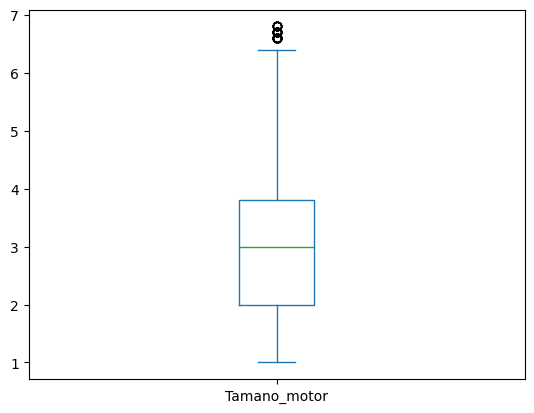

In [ ]:
data['Tamano_motor'].plot(kind='box')

<Axes: >

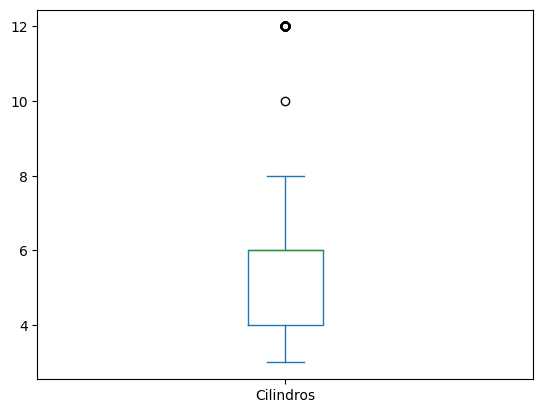

In [ ]:
data['Cilindros'].plot(kind='box')

<Axes: >

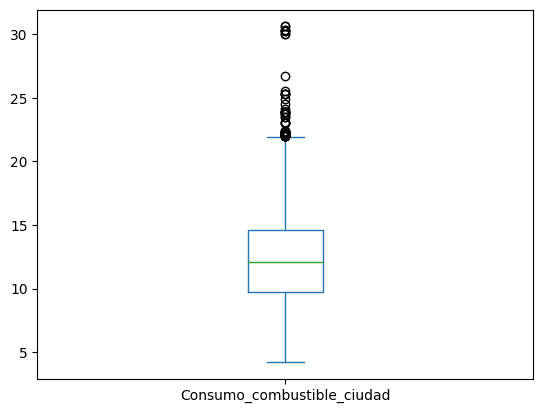

In [ ]:
data['Consumo_combustible_ciudad'].plot(kind='box')

<Axes: >

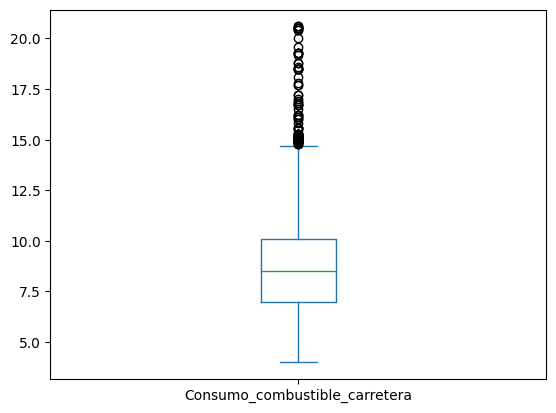

In [ ]:
data['Consumo_combustible_carretera'].plot(kind='box')

<Axes: >

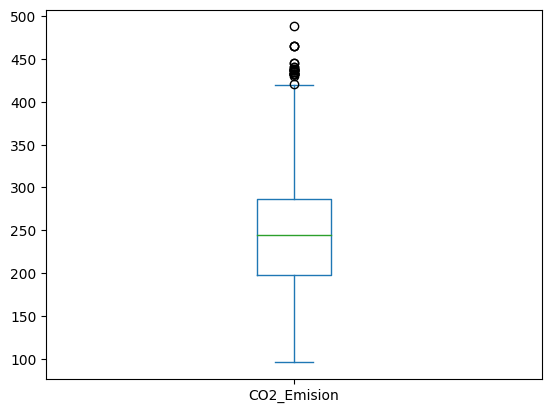

In [ ]:
data['CO2_Emision'].plot(kind='box')

In [ ]:
data_preparada = data.copy()

In [ ]:
#Dummies

data_preparada = pd.get_dummies(data_preparada, columns=['Tipo_vehiculo'], drop_first=False, dtype=int)
data_preparada.head()

Tamano_motor  Cilindros  Consumo_combustible_ciudad  \
0           2.0          4                         9.9   
1           2.4          4                        11.2   
2           1.5          4                         6.0   
3           3.5          6                        11.9   
4           3.5          6                        11.8   

   Consumo_combustible_carretera  CO2_Emision  Tipo_vehiculo_COMPACT  \
0                            6.7          196                      1   
1                            7.7          221                      1   
2                            5.8          136                      1   
3                            7.7          230                      0   
4                            8.0          232                      0   

   Tipo_vehiculo_FULL-SIZE  Tipo_vehiculo_MID-SIZE  Tipo_vehiculo_MINICOMPACT  \
0                        0                       0                          0   
1                        0                       0                          0   
2                        0                       0                          0   
3                        0                       1                          0   
4                        0                       1                          0   

   Tipo_vehiculo_MINIVAN  Tipo_vehiculo_TRUCK  Tipo_vehiculo_VAN  
0                      0                    0                  0  
1                      0                    0                  0  
2                      0                    0                  0  
3                      0                    0                  0  
4                      0                    0                  0

In [ ]:
#Normalizacion de variables numéricas
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_a_normalizar=['Tamano_motor', 'Cilindros',  'Consumo_combustible_ciudad', 'Consumo_combustible_carretera']
min_max_scaler.fit(data_preparada[variables_a_normalizar]) #Ajuste de parámetro
data_preparada[variables_a_normalizar]= min_max_scaler.transform(data_preparada[variables_a_normalizar])
data_preparada.head()

Tamano_motor  Cilindros  Consumo_combustible_ciudad  \
0      0.172414   0.111111                    0.215909   
1      0.241379   0.111111                    0.265152   
2      0.086207   0.111111                    0.068182   
3      0.431034   0.333333                    0.291667   
4      0.431034   0.333333                    0.287879   

   Consumo_combustible_carretera  CO2_Emision  Tipo_vehiculo_COMPACT  \
0                       0.162651          196                      1   
1                       0.222892          221                      1   
2                       0.108434          136                      1   
3                       0.222892          230                      0   
4                       0.240964          232                      0   

   Tipo_vehiculo_FULL-SIZE  Tipo_vehiculo_MID-SIZE  Tipo_vehiculo_MINICOMPACT  \
0                        0                       0                          0   
1                        0                       0                          0   
2                        0                       0                          0   
3                        0                       1                          0   
4                        0                       1                          0   

   Tipo_vehiculo_MINIVAN  Tipo_vehiculo_TRUCK  Tipo_vehiculo_VAN  
0                      0                    0                  0  
1                      0                    0                  0  
2                      0                    0                  0  
3                      0                    0                  0  
4                      0                    0                  0

División 70 - 30 --> No estratifiicada porque es regresión

<Axes: ylabel='Frequency'>

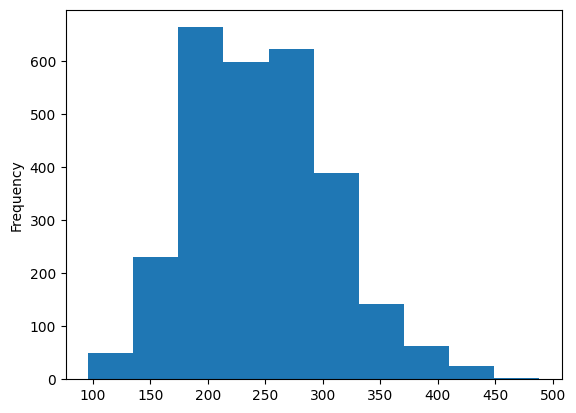

In [ ]:
from sklearn.model_selection import train_test_split
X = data_preparada.drop("CO2_Emision", axis = 1) # Variables predictoras
Y = data_preparada['CO2_Emision'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,)
Y_train.plot(kind="hist")

<Axes: ylabel='Frequency'>

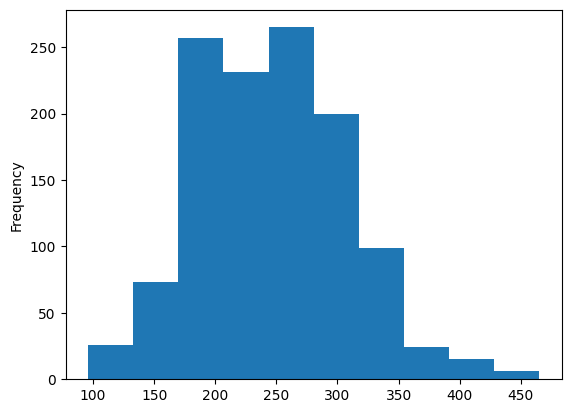

In [ ]:
# Variable objetivo del 30%

Y_test.plot(kind='hist')

In [ ]:
X_train.info() #Sirve para saber cuántos registros hay

<class 'pandas.core.frame.DataFrame'>
Index: 2789 entries, 2138 to 1279
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tamano_motor                   2789 non-null   float64
 1   Cilindros                      2789 non-null   float64
 2   Consumo_combustible_ciudad     2789 non-null   float64
 3   Consumo_combustible_carretera  2789 non-null   float64
 4   Tipo_vehiculo_COMPACT          2789 non-null   int64  
 5   Tipo_vehiculo_FULL-SIZE        2789 non-null   int64  
 6   Tipo_vehiculo_MID-SIZE         2789 non-null   int64  
 7   Tipo_vehiculo_MINICOMPACT      2789 non-null   int64  
 8   Tipo_vehiculo_MINIVAN          2789 non-null   int64  
 9   Tipo_vehiculo_TRUCK            2789 non-null   int64  
 10  Tipo_vehiculo_VAN              2789 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 261.5 KB


3. APRENDIZAJE Y EVALUACIÓN DEL MODELO

In [ ]:
#Aprendizaje
from sklearn.neural_network import MLPRegressor
model_NN = MLPRegressor(solver='adam', activation="relu",hidden_layer_sizes=(10),
                     learning_rate='adaptive', learning_rate_init=0.3, momentum= 0.2, max_iter=80,
                    verbose=True, random_state=3)
model_NN.fit(X_train, Y_train) #70%

Iteration 1, loss = 18445.30645004
Iteration 2, loss = 1939.71067709
Iteration 3, loss = 717.00206186
Iteration 4, loss = 344.06946578
Iteration 5, loss = 260.88961936
Iteration 6, loss = 228.29576396
Iteration 7, loss = 227.71195479
Iteration 8, loss = 225.91781574
Iteration 9, loss = 224.79011890
Iteration 10, loss = 223.67463208
Iteration 11, loss = 222.68515156
Iteration 12, loss = 222.07799925
Iteration 13, loss = 221.59630963
Iteration 14, loss = 220.92547454
Iteration 15, loss = 219.92439154
Iteration 16, loss = 219.48004219
Iteration 17, loss = 218.85100121
Iteration 18, loss = 218.43016458
Iteration 19, loss = 218.46155917
Iteration 20, loss = 217.73677538
Iteration 21, loss = 216.90890198
Iteration 22, loss = 217.39104803
Iteration 23, loss = 216.75142664
Iteration 24, loss = 216.36218007
Iteration 25, loss = 216.65516230
Iteration 26, loss = 215.15812686
Iteration 27, loss = 214.70305249
Iteration 28, loss = 216.31459600
Iteration 29, loss = 216.54981591
Iteration 30, loss =

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=10, learning_rate='adaptive',
             learning_rate_init=0.3, max_iter=80, momentum=0.2, random_state=3,
             verbose=True)

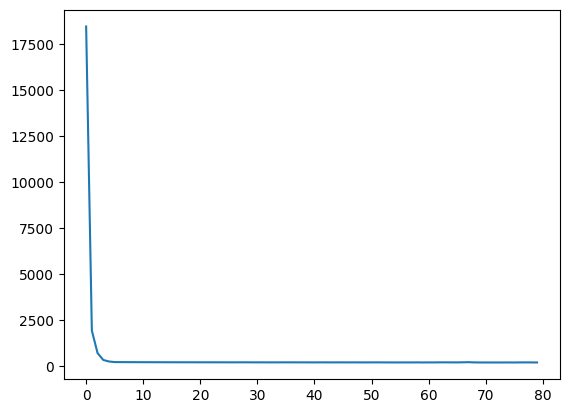

In [ ]:
#loss es la desviacion entre Y_train y Y_prep
loss_values = model_NN.loss_curve_
plt.plot(loss_values)

In [ ]:
#Resultado del aprendizaje
print(model_NN.coefs_) #w

[array([[-1.74674209e+00,  3.03228533e+00,  2.38697762e+00,
        -1.74264390e+00, -1.38086326e+00,  3.17417439e+00,
         2.51648673e+00, -1.44595448e+00, -2.27990750e+00,
         5.06027157e-28],
       [-2.30315832e+00,  3.12623959e+00,  3.12886031e+00,
        -1.95661682e+00, -1.61226801e+00,  3.22028732e+00,
         2.74293719e+00, -1.65452031e+00, -2.05751155e+00,
        -2.60977438e-27],
       [-2.03220903e+00,  1.10783897e+01,  1.05096481e+01,
        -2.09833024e+00, -1.75261509e+00,  1.12954861e+01,
         1.03289401e+01, -1.39600835e+00, -1.92032904e+00,
         1.37669202e-26],
       [-1.29225926e+00,  1.94493636e+00,  1.99831554e+00,
        -1.38460948e+00, -1.93065078e+00,  1.23458644e+00,
         2.10656196e+00, -1.56700028e+00, -1.94838754e+00,
         4.02599503e-27],
       [ 3.21511390e-27,  3.34332787e+00,  2.59384263e+00,
        -7.17725605e-27, -1.34355737e-27,  3.70646201e+00,
         3.63118318e+00, -2.20369630e+00, -3.48840185e-28,
         1

In [ ]:
print(model_NN.intercepts_)#b

[array([-1.81758729,  3.6236033 ,  3.12671417, -2.14672359, -2.25746779,
        4.04618841,  3.90632425, -2.13467597, -1.89345454, -0.48202284]), array([4.60482922])]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar la red neuronal
def plot_neural_network(coefs_, intercepts_, input_layer_size, hidden_layer_sizes, output_layer_size):
    # Posiciones de las capas
    layer_sizes = [input_layer_size] + list(hidden_layer_sizes) + [output_layer_size]
    num_layers = len(layer_sizes)
    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(100, 100))
    ax.set_xlim(0, num_layers)
    ax.set_ylim(0, max(layer_sizes) + 1)
    ax.set_axis_off()

    # Función para ubicar las neuronas en la gráfica
    def draw_neurons(layer, layer_size, y_offset):
        neuron_positions = []
        for neuron in range(layer_size):
            y = y_offset + neuron
            neuron_positions.append((layer, y))
            circle = plt.Circle((layer, y), radius=0.3, fill=True, color='lightblue', ec='black')
            ax.add_artist(circle)
        return neuron_positions

    # Función para dibujar los pesos y sesgos
    def draw_weights(layer_pos, next_layer_pos, weights, intercepts):
        for i, (x1, y1) in enumerate(layer_pos):
            for j, (x2, y2) in enumerate(next_layer_pos):
                weight = weights[i, j]
                ax.plot([x1, x2], [y1, y2], 'k-', lw=0.5)
                mid_x = (x1 + x2) / 2
                mid_y = (y1 + y2) / 2
                ax.text(mid_x, mid_y, f'{weight:.2f}', fontsize=8, color='red')

        for i, (x, y) in enumerate(next_layer_pos):
            ax.text(x + 0.4, y, f'b={intercepts[i]:.2f}', fontsize=8, color='blue')

    # Dibujar las capas
    layer_positions = []
    for i, layer_size in enumerate(layer_sizes):
        y_offset = (max(layer_sizes) - layer_size) / 2
        layer_positions.append(draw_neurons(i, layer_size, y_offset))

    # Dibujar los pesos y los sesgos entre capas
    for i in range(num_layers - 1):
        draw_weights(layer_positions[i], layer_positions[i+1], coefs_[i], intercepts_[i])

    plt.title("Arquitectura de la Red Neuronal con Pesos (w) e Interceptos (b)")
    plt.show()

# Parámetros del modelo entrenado
input_layer_size = X_train.shape[1]
hidden_layer_sizes = model_NN.hidden_layer_sizes if isinstance(model_NN.hidden_layer_sizes, tuple) else (model_NN.hidden_layer_sizes,)
output_layer_size = model_NN.n_outputs_
coefs_ = model_NN.coefs_
intercepts_ = model_NN.intercepts_

# Llamar a la función para graficar
plot_neural_network(coefs_, intercepts_, input_layer_size, hidden_layer_sizes, output_layer_size)

In [ ]:
#Evaluación sobre el conjunto de prueba
from sklearn import metrics

Y_pred = model_NN.predict(X_test)#30% de los datos

mape = metrics.mean_absolute_percentage_error(Y_test, Y_pred)
print(mape)

0.0628731491800353


In [ ]:
import pickle
filename = 'modelo-reg.pkl'
variables=X.columns._values
pickle.dump([ model_NN,  variables, min_max_scaler], open(filename, 'wb'))